In [18]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import cv2
import numba

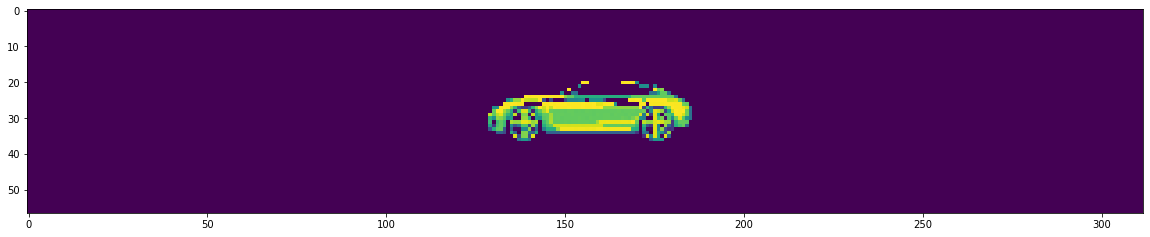

In [78]:
carro = cv2.cvtColor(cv2.imread('carro.png'),cv2.COLOR_BGR2GRAY)
zeros = np.zeros((227,500))
carro = np.concatenate((zeros,carro,zeros),axis=1)
carro = carro*(carro<100)
carro = cv2.resize(carro,(0,0),fx=0.25,fy=0.25)
cylinder = carro>0

plt.figure(figsize=(20,12))
plt.imshow(carro)

In [206]:
Nx          = np.shape(cylinder)[1]    # resolution x-dir
Ny          = np.shape(cylinder)[0]    # resolution y-dir
rho0        = 100    # average density
tau         = 1    # collision timescale
Nt          = 250   # number of timesteps

# Lattice speeds / weights
NL = 9
idxs = np.arange(NL)
cxs = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
cys = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # sums to 1
X, Y = np.meshgrid(range(Nx), range(Ny))

# Initial Conditions - flow to the right with some perturbations
F = np.ones((Ny,Nx,NL)) + 0.01*np.random.randn(Ny,Nx,NL)
F[:,:,3] += 2 
rho = np.sum(F,2)
for i in idxs:
    F[:,:,i] *= rho0 / rho

# Cylinder boundary


frame = []

for it in tqdm.tqdm(range(Nt)):
    frame.append(F[:,:,0])
    for i, cx, cy in zip(idxs, cxs, cys):
        F[:,:,i] = np.roll(F[:,:,i], cx, axis=1)
        F[:,:,i] = np.roll(F[:,:,i], cy, axis=0)
  
    bndryF = F[cylinder,:]
    bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]
  
    rho = np.sum(F,2)
    ux  = np.sum(F*cxs,2) / rho
    uy  = np.sum(F*cys,2) / rho
    
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(idxs, cxs, cys, weights):
        Feq[:,:,i] = rho*w* (1 + 3*(cx*ux+cy*uy) + 9*(cx*ux+cy*uy)**2/2 - 3*(ux**2+uy**2)/2)
  
    F += -(1.0/tau) * (F - Feq)

    F[cylinder,:] = bndryF

100%|██████████| 250/250 [00:02<00:00, 115.53it/s]


In [209]:
rho

array([[95.90482761, 95.74753533, 95.57867432, ..., 96.37916623,
        96.22190306, 96.07170217],
       [95.9238932 , 95.76635694, 95.59649763, ..., 96.39815009,
        96.24108522, 96.09122791],
       [95.93854956, 95.78165686, 95.61187593, ..., 96.4103083 ,
        96.2542126 , 96.1054177 ],
       ...,
       [95.82583452, 95.67455035, 95.5148726 , ..., 96.28521624,
        96.13236095, 95.98572132],
       [95.85542724, 95.70126391, 95.53751173, ..., 96.32235028,
        96.16717986, 96.01857565],
       [95.8820313 , 95.72585987, 95.55902845, ..., 96.35389421,
        96.19728011, 96.04750568]])

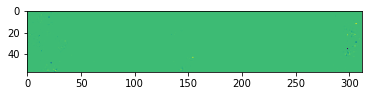

In [198]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(len(frame)):
    frames.append([plt.imshow(frame[i],animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=25, blit=True)
ani.save('movie.mp4')

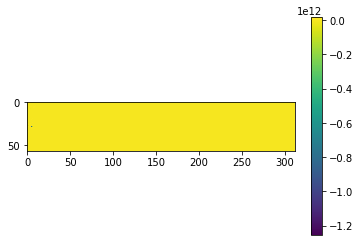

In [208]:
plt.imshow(frame_array[1])
plt.colorbar()

In [142]:
F[:,:,0]

array([[0.43746868, 0.43750369, 0.43753373, ..., 0.43747129, 0.43744556,
        0.43746314],
       [0.43743732, 0.43747406, 0.43750883, ..., 0.4374371 , 0.43741118,
        0.43742904],
       [0.43738231, 0.43742154, 0.43746129, ..., 0.43738156, 0.43735396,
        0.43737201],
       ...,
       [0.43753707, 0.43756165, 0.43756731, ..., 0.43755486, 0.43752945,
        0.43754645],
       [0.43751896, 0.43754695, 0.43756109, ..., 0.43753348, 0.43750711,
        0.43752351],
       [0.43750954, 0.43754081, 0.43756253, ..., 0.43751668, 0.43749147,
        0.43750878]])